# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Siddik Ayyappa<br>
Roll Number: 2020101089 <br>

In [29]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [30]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## Load Data

In [31]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [32]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)

    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [33]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


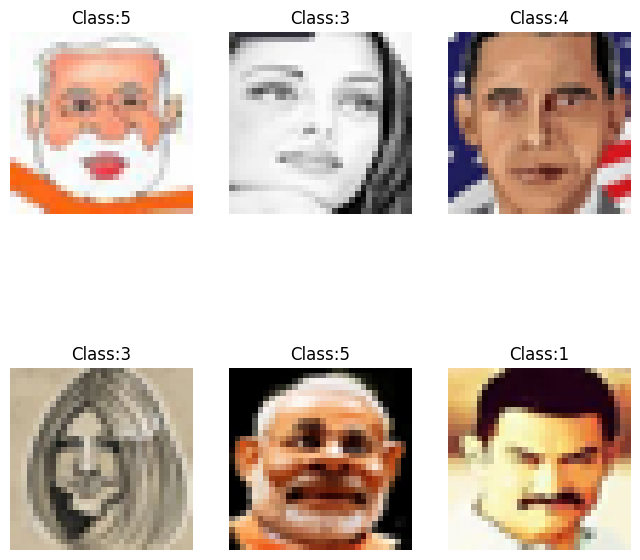

In [34]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [35]:
X = X.reshape(len(X), -1)

In [36]:
# write function
def compute_eigen_values(X):
    mean_sub = (X - np.mean(X, axis=0))
    AAt = mean_sub.dot(mean_sub.T)
    eigen_values, eigen_vectors = np.linalg.eigh(AAt) # AAt is a symmetric matrix, we can use eigh
    idx = range(len(eigen_values)-1, -1, -1)
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    eigen_faces = mean_sub.T.dot(eigen_vectors)
    return eigen_values, eigen_vectors, eigen_faces
eigen_values, eigen_vectors, eigen_faces = compute_eigen_values(X)

#### Compute eigen values and plot eigen value spectrum

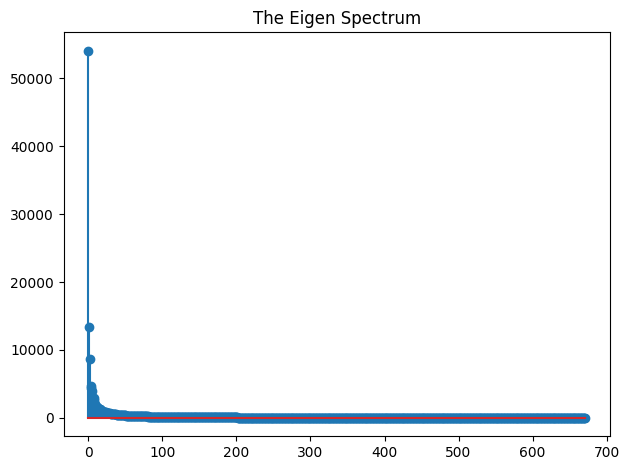

In [37]:
# eigen values and spectrum
plt.stem(range(len(eigen_values)),eigen_values,)
plt.title("The Eigen Spectrum")
plt.tight_layout()
plt.show()

#### Plot the percentage of variances vs the number of principal components

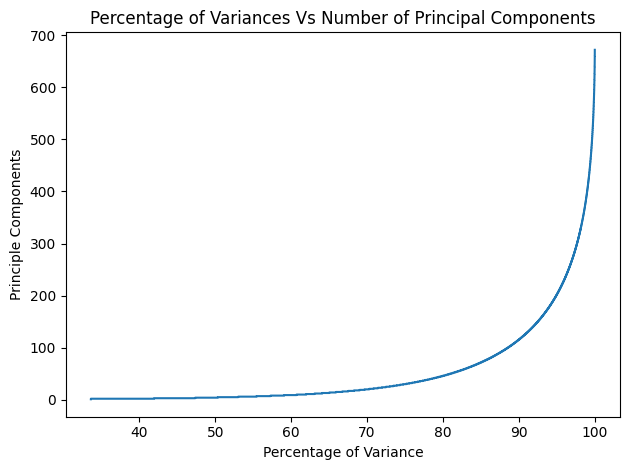

In [38]:
# plot variance vs components
eigen_ratio = (eigen_values/sum(eigen_values))*100
percentage = np.cumsum(eigen_ratio)
plt.step(percentage, range(1, len(percentage)+1))
plt.title("Percentage of Variances Vs Number of Principal Components")
plt.xlabel("Percentage of Variance")
plt.ylabel("Principle Components")
plt.tight_layout()
plt.show()

for i in range(len(percentage)):
    if(percentage[i] >= 90):
        entire_dataset = i
        break

#### Visualize eigen faces(eigen vectors)

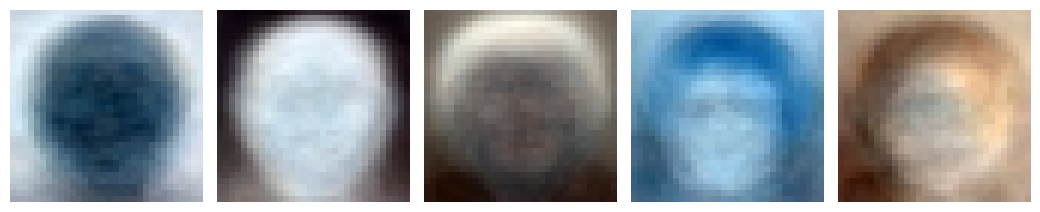

In [39]:
def plot_img(image,H,W,C,indices):
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
        plt.tight_layout()
    plt.show()

indices = list(range(0, 5))
plot_img(eigen_faces.T,H,W,C, indices)

### Interpretation of what the ghost faces mean
- Each of the ghost face above represents an eigen face
- With the help of the M eigen vectors, on would be able to reconstruct the face images, $\Gamma_i$, as a linear combination of the M eigen faces. 
- In other words the M eigen faces span the face-space. (The Space of all possible images.)
- If we take fewer eigen faces, we would still be able to reconstruct each of the face image, with some loss, which will be reduced as we take more eigenfaces.
- The eigenface with the largest corresponding eigenvalues, have the highest variance, within the whole training set. (if all the datapoints are projected onto this vector, the variance among the projections will be the highest among others.)
- [source](https://www.face-rec.org/algorithms/PCA/jcn.pdf)

#### Reconstruction 

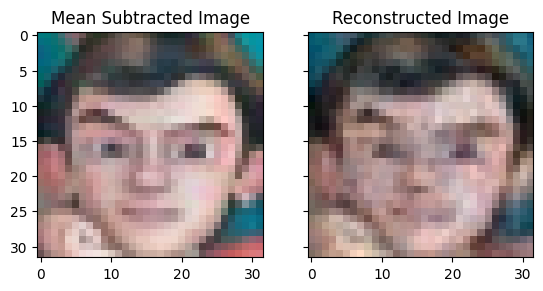

In [40]:
# reconstruction
eigen_faces = eigen_faces.T
for i in range(len(eigen_faces)):
    eigen_faces[i] /= np.linalg.norm(eigen_faces[i])
n_components = 200
mean_face = np.mean(X, axis=0)
mean_sub_img = X - mean_face
test_img = mean_sub_img[4]
temp =eigen_faces[:n_components].dot(test_img)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.title.set_text("Mean Subtracted Image")
ax1.imshow((test_img.reshape((32, 32, 3))- np.min(test_img))/(np.max(test_img) - np.min(test_img))) # Normalizing the whole image. Gives a better look of the image. 
reconstruction = eigen_faces[:n_components].T.dot(temp)
ax2.imshow((reconstruction.reshape((32, 32, 3)) - np.min(reconstruction))/(np.max(reconstruction) - np.min(reconstruction)))
ax2.title.set_text("Reconstructed Image")
plt.show()


### 5 numbers and Reconstruction Error

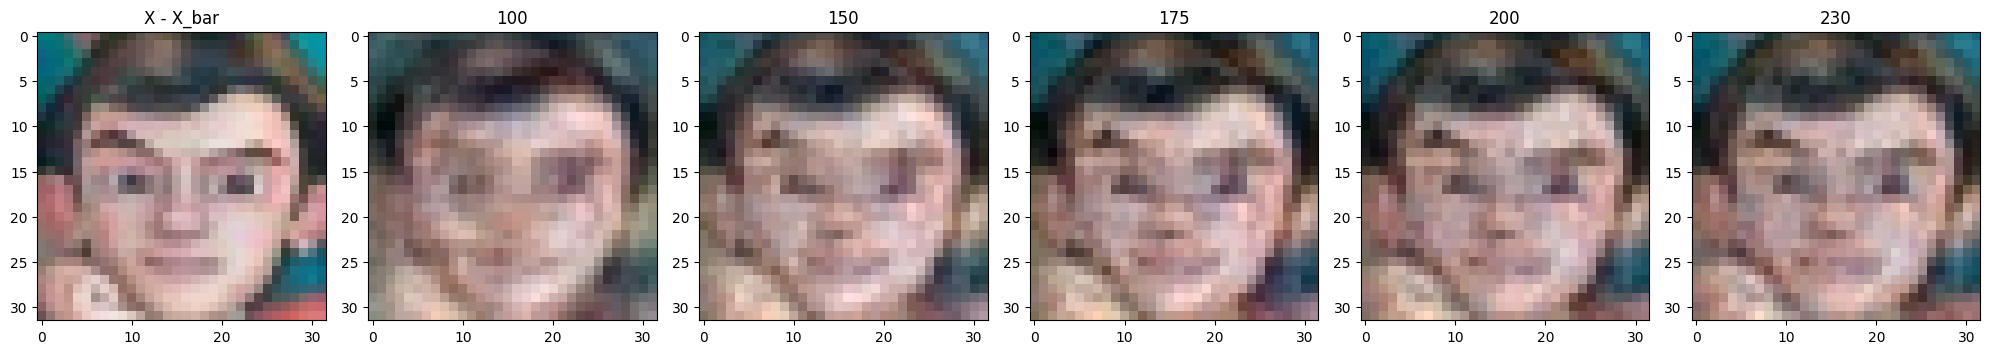

In [41]:
nums = [100, 150, 175, 200, 230]
fig, axes = plt.subplots(1, 6, figsize=(20, 20))
axes[0].title.set_text("X - X_bar")
axes[0].imshow((test_img.reshape((32, 32, 3))- np.min(test_img))/(np.max(test_img) - np.min(test_img))) # Normalizing the whole image. Gives a better look of the image. 
reconstruction_error = []
for i in range(len(nums)):
    mean_sub_img = X - mean_face
    test_img = mean_sub_img[4]
    latent = eigen_faces[:nums[i]].dot(test_img)
    ax_temp = axes[i+1]
    ax_temp.title.set_text(str(nums[i]))
    reconstruction = eigen_faces[:nums[i]].T.dot(latent)
    ax_temp.imshow((reconstruction.reshape((32, 32, 3)) - np.min(reconstruction))/(np.max(reconstruction) - np.min(reconstruction)))
    reconstruction_error += [sum((reconstruction - test_img)**2)]   # Forbinius Norm
# axes[6].plot(list(range(1, len(error)+1)), error)
plt.tight_layout()
plt.show()


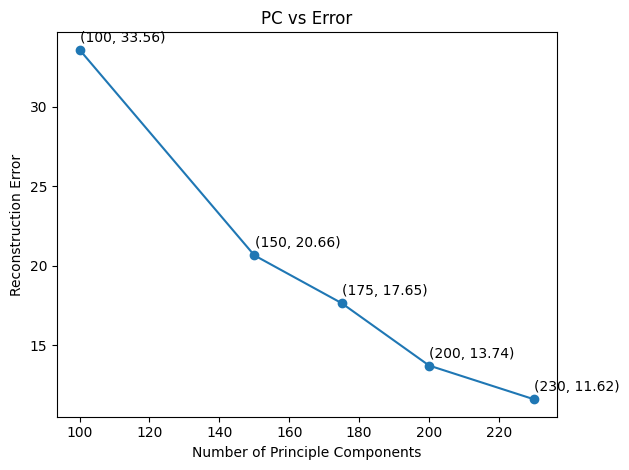

In [42]:
for i, j in zip(nums, reconstruction_error):
   plt.text(i+0.1, j+0.5, '(%d, %.2f)'%(i, j))
plt.plot([i for i in nums], reconstruction_error)
plt.scatter([i for i in nums], reconstruction_error)
plt.xlabel("Number of Principle Components")
plt.ylabel("Reconstruction Error")
plt.title("PC vs Error")
plt.tight_layout()
plt.show()

#### Plot data in 2D

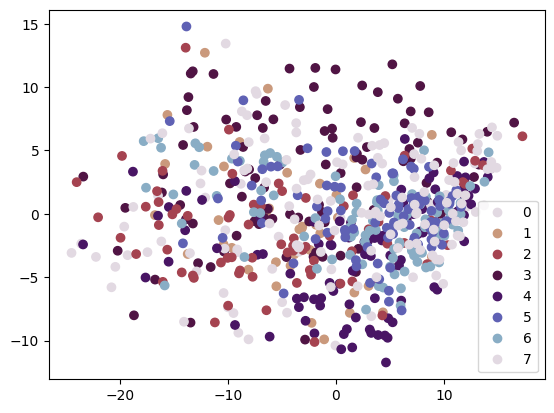

In [43]:
# plot data in 2D
n_components_1 = 2
pca_2 = []
for i in mean_sub_img:
    temp_1  = eigen_faces[:n_components_1].dot(i)
    pca_2 += [temp_1]
pca_2 = np.array(pca_2)
# this is the 2 dimensional data after PCAing the whole data
fig, axes = plt.subplots()
scatter = axes.scatter(pca_2[:, 0], pca_2[:,1], c=y, cmap=plt.cm.twilight_r)
legend_temp = axes.legend(*scatter.legend_elements(), )
plt.show()

In [44]:
print("The percent variance preserved with 2 principle components:", percentage[1])

The percent variance preserved with 2 principle components: 41.9634031218153


### Observations
Since, the data has been brought down to the level of 2 components, we know that the variance preserved variance is 41% $\pm$ 1% approx. Which means, it is fair to hypothesise most of the data's spread has not been captured with the current principle components. (less than 50%). According to this hypothesis, it is quite reasonable to predict that the samples would be quite clustered together, or rather have less variance. Which is true, from the observartions we make in the 2D plot of the dataset.

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [45]:
# Load data again
X,y = load_data(dirpath)
X = X.reshape(len(X), -1)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

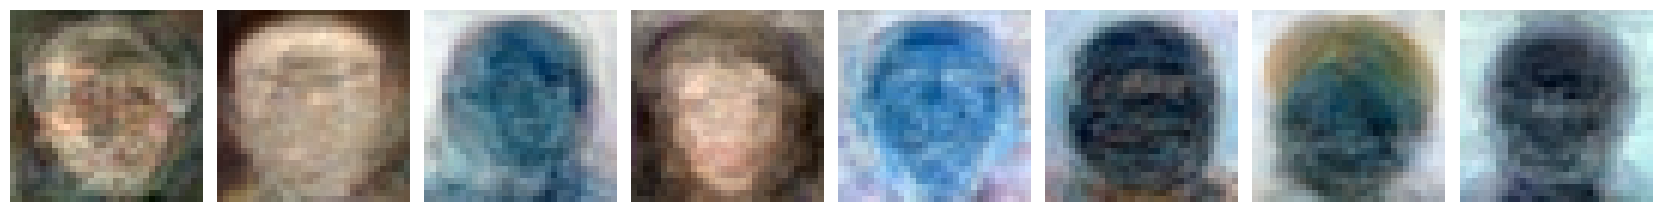

In [46]:
# visualize
dom_faces, eigen_values_1 ,eigen_vectors_1 = [], [], []
for i in range(len(np.unique(y))):
    idx_1 = np.where(y==i)
    X_1 = X[idx_1]
    eig_val_1, eig_vec_1, eig_face_1 = compute_eigen_values(X_1)
    dom_faces += [eig_face_1.T[0]]
    eigen_values_1 += [eig_val_1]
    eigen_vectors_1 += [eig_vec_1]
dom_faces, eigen_values_1, eigen_vectors_1  = np.array(dom_faces), np.array(eigen_values_1), np.array(eigen_vectors_1)
plot_img(dom_faces,H,W,C, list(range(len(dom_faces))))

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [47]:
# components required
pc_retained = []
for i in range(len(np.unique(y))):
    eigen_ratio = (eigen_values_1[i]/sum(eigen_values_1[i]))*100
    percentage = np.cumsum(eigen_ratio)
    for j in range(len(percentage)):
        if(percentage[j] >= 90):
            pc_retained += [j]
            break
inv_map = {v: k for k, v in cfw_dict.items()}
df = pd.DataFrame({"Classes": [inv_map[i] for i in range(len(np.unique(y)))]+["Entire Dataset"], "Number of Components to retain 90% variance":pc_retained+[entire_dataset]})
df.set_index("Classes")

,Number of Components to retain 90% variance
Classes,
Amitabhbachan,20
AamirKhan,23
DwayneJohnson,27
AishwaryaRai,35
BarackObama,42
NarendraModi,56
ManmohanSingh,49
VladimirPutin,43
Entire Dataset,114


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Clearly the number of components requireed to retain 90% of the variance is not the same for all the classes. 

The number of components are not same for each of the class and the whole dataset is not the same. The variance, is calculated after the samples are projected onto the principal components. Consider taking a class and plotting all the images of the classes. Clearly they will be less spread (on the principal components) out than the whole dataset, since they all come from the same face (hence they are related). Which means that the principle components, which capture the most variance, will capture a predominant protion of variance, compared to the other principal components. Hence, capturing most of the variance, is done in lesser number of principal components. 

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [49]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [50]:
# code here
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


mse = []
score = []
x_train, x_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=42)
for i in range(1, 201):
    lr_model = LinearRegression()
    pca_model = PCA(n_components = i)
    temp = (pca_model.fit_transform(x_train))
    lr_model.fit(temp, y_train)
    x_test_temp = (pca_model.transform((x_test)))
    y_pred = lr_model.predict(x_test_temp)
    mse += [(sum((y_pred - y_test)**2))]
    score += [lr_model.score(x_test_temp, y_test)]

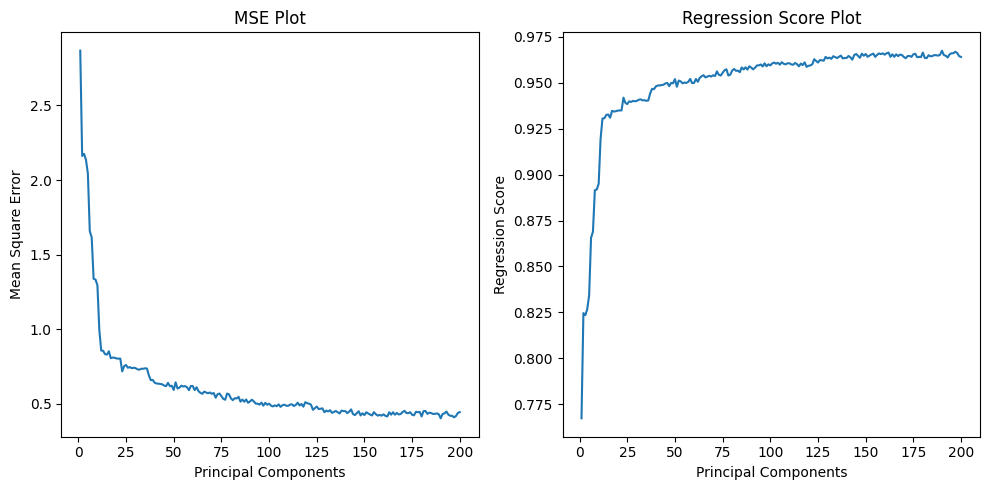

In [51]:
# analysis / plot (split the cells if required)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(list(range(1, 201)), mse)
ax1.set_ylabel("Mean Square Error")
ax1.set_xlabel("Principal Components")
ax1.title.set_text("MSE Plot")
ax2.plot(list(range(1, 201)), score)
ax2.title.set_text("Regression Score Plot")
ax2.set_ylabel("Regression Score")
ax2.set_xlabel("Principal Components")
plt.tight_layout()
plt.show()

### Observations
We see that as the number of principal components increase, the linear regression model has been peforming better. The regression score has been slowly getting toward 1 (ideal regression).  The mean square error has also been getting low, closing in on 0 (ideal regression). Since, we are performing regression on latent representations of the data, we can say that there is a loss of variance, on the data we are performing regression on. 

Now, let us take the case where we PCA the data with $m, n$ components, where $m < n$. Which means that the data of n principal components shall capture more variance of the data, than the m components. Which means that there are more independent components in the m components dataset, than the n components one, which influence the final output. Hence, As the number of principal components increase, we can see an increase in the performance. 